# Scraping Data

In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import Sort, reviews
import pandas as pd

In [3]:
result = reviews(
    'com.gojek.gopay',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=7000
)

In [4]:
result = pd.DataFrame(result[0])
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              7000 non-null   object        
 1   userName              7000 non-null   object        
 2   userImage             7000 non-null   object        
 3   content               7000 non-null   object        
 4   score                 7000 non-null   int64         
 5   thumbsUpCount         7000 non-null   int64         
 6   reviewCreatedVersion  6920 non-null   object        
 7   at                    7000 non-null   datetime64[ns]
 8   replyContent          4525 non-null   object        
 9   repliedAt             4525 non-null   datetime64[ns]
 10  appVersion            6920 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 601.7+ KB


In [5]:
data = result.to_csv('result.csv', index=False)

# Data Cleaning

In [6]:
data = pd.read_csv('result.csv')
data = data.drop(['reviewId','userName', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt'],axis=1)

In [7]:
data = data.drop_duplicates()
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6920 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        6920 non-null   object
 1   score          6920 non-null   int64 
 2   thumbsUpCount  6920 non-null   int64 
 3   at             6920 non-null   object
 4   appVersion     6920 non-null   object
dtypes: int64(2), object(3)
memory usage: 324.4+ KB


In [8]:
data['at'] = pd.to_datetime(data['at'])
data = data[data['at'].dt.year == 2025]

data['month'] = data['at'].dt.month.astype('str')
data = data.drop(columns=['at'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6920 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        6920 non-null   object
 1   score          6920 non-null   int64 
 2   thumbsUpCount  6920 non-null   int64 
 3   appVersion     6920 non-null   object
 4   month          6920 non-null   object
dtypes: int64(2), object(3)
memory usage: 324.4+ KB


In [9]:
data.head()

,content,score,thumbsUpCount,appVersion,month
0,aplikasi nya udh bagus seperti yang lainnya ta...,2,1,1.56.1,8
1,Saya download aplikasi ini dan saat masukan no...,1,8,1.56.1,8
2,aplikasi gopay ini bagus tapi saat mau membaya...,2,8,1.56.1,8
3,"aplikasinya bagus aja, cuma ad sedikit masalah...",3,18,1.56.1,8
4,Cukup kecewa update kali ini. Mengapa sistem b...,2,14,1.56.1,8


In [10]:
print(data['appVersion'].unique())

['1.56.1' '1.53.0' '1.57.0' '1.52.0' '1.54.0' '1.51.0' '1.49.1' '1.49.0'
 '1.48.0' '1.45.0' '1.47.0' '1.46.1' '1.44.0' '1.56.0' '1.39.0' '1.26.1'
 '1.15.1' '1.21.0']


In [11]:
data['minorVersion'] = data['appVersion']
data = data.drop(columns=['appVersion'], axis=1)
data['majorVersion'] = data['minorVersion'].str[:3]
data.head()

,content,score,thumbsUpCount,month,minorVersion,majorVersion
0,aplikasi nya udh bagus seperti yang lainnya ta...,2,1,8,1.56.1,1.5
1,Saya download aplikasi ini dan saat masukan no...,1,8,8,1.56.1,1.5
2,aplikasi gopay ini bagus tapi saat mau membaya...,2,8,8,1.56.1,1.5
3,"aplikasinya bagus aja, cuma ad sedikit masalah...",3,18,8,1.56.1,1.5
4,Cukup kecewa update kali ini. Mengapa sistem b...,2,14,8,1.56.1,1.5


In [12]:
print(data['majorVersion'].unique())

['1.5' '1.4' '1.3' '1.2' '1.1']


# Exploratory Data Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data.describe()

,score,thumbsUpCount
count,6920.000000,6920.000000
mean,2.619798,6.421243
std,1.780914,32.603056
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,5.000000,2.000000
max,5.000000,1419.000000


<Axes: xlabel='score', ylabel='count'>

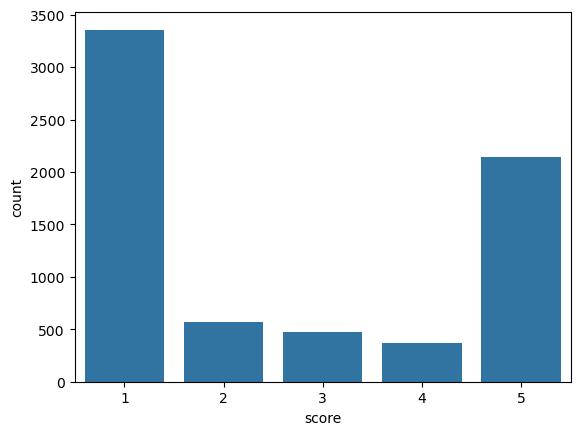

In [15]:
sns.countplot(data=data, x='score')

<Axes: xlabel='month', ylabel='count'>

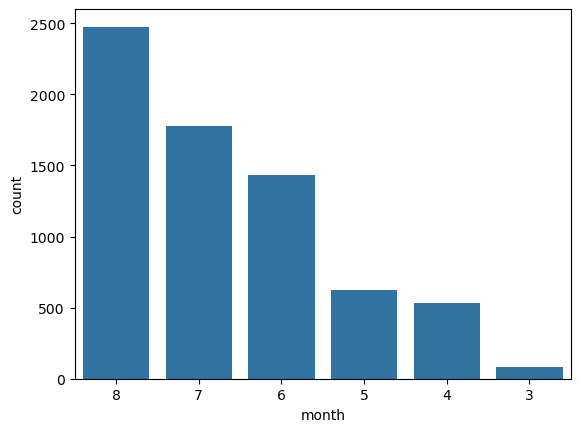

In [16]:
sns.countplot(data=data, x='month')

<Axes: xlabel='majorVersion', ylabel='count'>

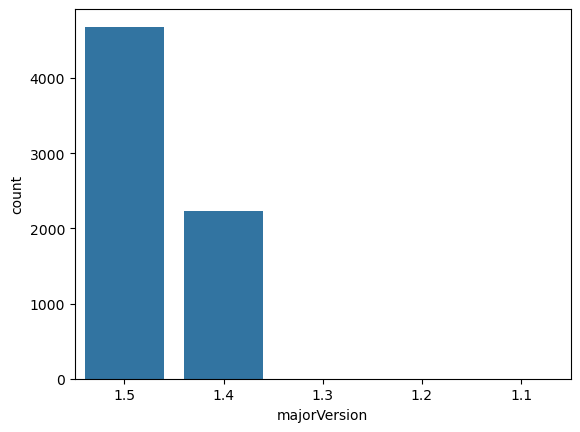

In [17]:
sns.countplot(data=data, x='majorVersion')

<Axes: xlabel='score', ylabel='thumbsUpCount'>

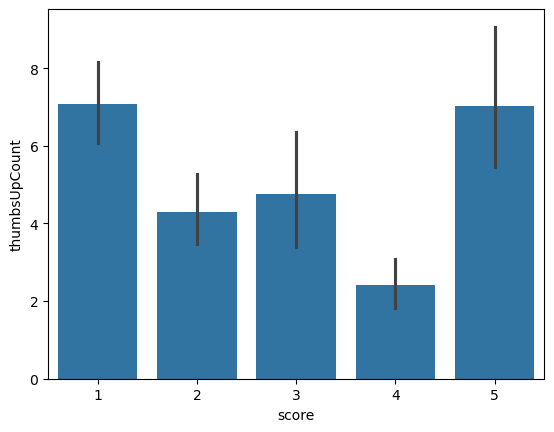

In [18]:
sns.barplot(data=data, x='score', y='thumbsUpCount')

<Axes: xlabel='majorVersion', ylabel='score'>

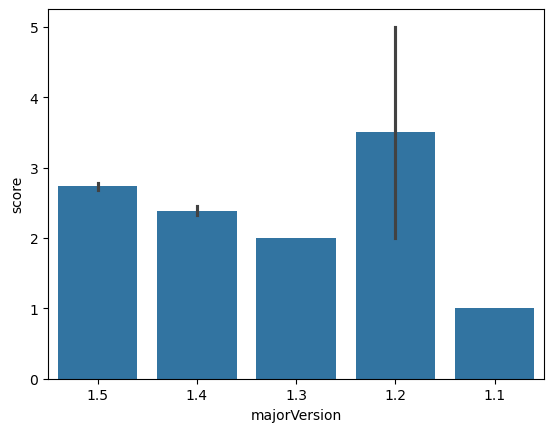

In [19]:
sns.barplot(data=data, x='majorVersion', y='score')

<Axes: xlabel='month', ylabel='Count'>

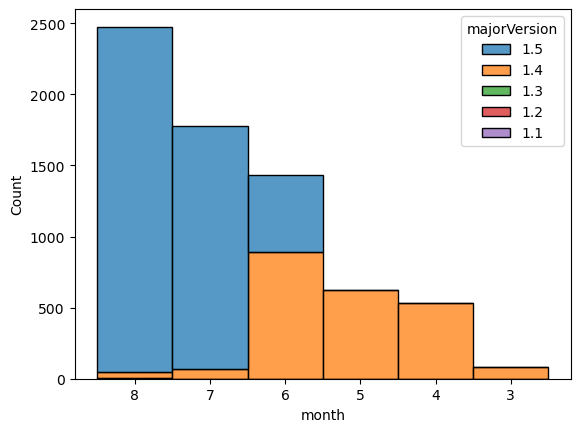

In [20]:
sns.histplot(data=data, x='month', hue='majorVersion', multiple="stack")

In [21]:
data.pivot_table(index='majorVersion',
                columns='month',
                values='score',
                aggfunc='mean')

month,3,4,5,6,7,8
majorVersion,,,,,,
1.1,NaN,NaN,NaN,NaN,NaN,1.000000
1.2,NaN,NaN,5.00000,NaN,NaN,2.000000
1.3,NaN,NaN,NaN,NaN,2.000000,NaN
1.4,2.101266,2.443396,2.36715,2.332958,2.724638,3.022222
1.5,NaN,NaN,NaN,2.155393,2.728178,2.862907


# Sentiment Analysis

In [22]:
!pip install tqdm

In [24]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [nltk]1/2 [nltk]


In [26]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 48.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [transformers] [transformers]ub]


In [27]:
import re
import string
from tqdm import tqdm
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import pipeline
tqdm.pandas()
import asyncio
import time
import transformers

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
translator = pipeline(
    "translation",
    model="facebook/nllb-200-distilled-600M",
    src_lang="ind_Latn",
    tgt_lang="eng_Latn"
)

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [29]:
def translate(text):
  return translator(text)[0]["translation_text"]

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizing(text):
  tokens = word_tokenize(text)
  return tokens

def stopwordstext(text):
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in text if word not in stop_words]
  return filtered_tokens

def lemitizing(text):
  lemmatizer = WordNetLemmatizer()
  processed_text = [lemmatizer.lemmatize(word) for word in text]
  processed_text = " ".join(processed_text)
  return processed_text

pipe = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")
def sentimenttext(text):
  result = pipe(text)
  return result[0]['label']

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [30]:
docs = pd.DataFrame(data['content'].reset_index(drop=True), columns=['content'])

docs['text_translate'] = docs['content'].progress_apply(translate)
docs['text_clean'] = docs['text_translate'].progress_apply(cleaningText)
docs['text_lower'] = docs['text_clean'].progress_apply(casefoldingText)
docs['text_tokenizing'] = docs['text_lower'].progress_apply(tokenizing)
docs['text_stopwords'] = docs['text_tokenizing'].progress_apply(stopwordstext)
docs['text_lemitizing'] = docs['text_stopwords'].progress_apply(lemitizing)
docs['text_label'] = docs['text_lemitizing'].progress_apply(sentimenttext)

  0% 11/6920 [00:03<30:59,  3.72it/s]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
 45% 3121/6920 [10:09<08:36,  7.36it/s]Your input_length: 183 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 53% 3639/6920 [12:03<08:53,  6.15it/s]Your input_length: 228 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
100% 6920/6920 [19:54<00:00,  5.79it/s]
100% 6920/6920 [00:00<00:00, 166420.59it/s]
100% 6920/6920 [00:00<00:00, 3488951.04it/s]
100% 6920/6920 [00:00<00:00, 34061.62it/s]
100% 6920/6920 [00:00<00:00, 45167.42it/s]
100% 6920/6920 [00:01<00:00, 6389.93it/s]
100% 6920/6920 [00:07<00:00, 913.35it/s]


In [31]:
docs

,content,text_translate,text_clean,text_lower,text_tokenizing,text_stopwords,text_lemitizing,text_label
0,aplikasi nya udh bagus seperti yang lainnya ta...,"The app is just as good as the others, but the...",The app is just as good as the others but ther...,the app is just as good as the others but ther...,"[the, app, is, just, as, good, as, the, others...","[app, good, others, theres, lot, weirdness, li...",app good others there lot weirdness like spin ...,NEGATIVE
1,Saya download aplikasi ini dan saat masukan no...,I downloaded this app and when I entered the n...,I downloaded this app and when I entered the n...,i downloaded this app and when i entered the n...,"[i, downloaded, this, app, and, when, i, enter...","[downloaded, app, entered, number, otp, code, ...",downloaded app entered number otp code worked ...,NEGATIVE
2,aplikasi gopay ini bagus tapi saat mau membaya...,"This gopay app is great, but when I want to pa...",This gopay app is great but when I want to pay...,this gopay app is great but when i want to pay...,"[this, gopay, app, is, great, but, when, i, wa...","[gopay, app, great, want, pay, transaction, th...",gopay app great want pay transaction there pro...,NEGATIVE
3,"aplikasinya bagus aja, cuma ad sedikit masalah...","It's a good app, but it's just a little bit of...",Its a good app but its just a little bit of a ...,its a good app but its just a little bit of a ...,"[its, a, good, app, but, its, just, a, little,...","[good, app, little, bit, problem, trying, pay,...",good app little bit problem trying pay topup g...,POSITIVE
4,Cukup kecewa update kali ini. Mengapa sistem b...,I'm pretty disappointed with the update this t...,Im pretty disappointed with the update this ti...,im pretty disappointed with the update this ti...,"[im, pretty, disappointed, with, the, update, ...","[im, pretty, disappointed, update, time, curre...",im pretty disappointed update time current gop...,NEGATIVE
...,...,...,...,...,...,...,...,...
6915,"tolong di perbaiki lagi aplikasinya, karena ti...","Please fix the app again, because there's no p...",Please fix the app again because theres no plu...,please fix the app again because theres no plu...,"[please, fix, the, app, again, because, theres...","[please, fix, app, theres, plug, print, blueto...",please fix app there plug print bluetooth printer,NEGATIVE
6916,saya suka apl ini nyaman bertransaksi tidak le...,I like this app. It's convenient to transact n...,I like this app Its convenient to transact no ...,i like this app its convenient to transact no ...,"[i, like, this, app, its, convenient, to, tran...","[like, app, convenient, transact, thank]",like app convenient transact thank,POSITIVE
6917,"chatbot gk guna mau upgrade akun gk bs, gk ada...",Chatbots aren't upgrading accounts. There's no...,Chatbots arent upgrading accounts Theres no po...,chatbots arent upgrading accounts theres no po...,"[chatbots, arent, upgrading, accounts, theres,...","[chatbots, arent, upgrading, accounts, theres,...",chatbots arent upgrading account there point u...,NEGATIVE
6918,ini gopay kenapa? apakah ganguan atau sudah ga...,is this gopay why? is it ganguan or is it no l...,is this gopay why is it ganguan or is it no lo...,is this gopay why is it ganguan or is it no lo...,"[is, this, gopay, why, is, it, ganguan, or, is...","[gopay, ganguan, longer, working, tokopedia, p...",gopay ganguan longer working tokopedia paylate...,NEGATIVE


In [32]:
data = data.reset_index(drop=True)
docs = docs.reset_index(drop=True)
data['labels'] = docs['text_label']
data.head()

,content,score,thumbsUpCount,month,minorVersion,majorVersion,labels
0,aplikasi nya udh bagus seperti yang lainnya ta...,2,1,8,1.56.1,1.5,NEGATIVE
1,Saya download aplikasi ini dan saat masukan no...,1,8,8,1.56.1,1.5,NEGATIVE
2,aplikasi gopay ini bagus tapi saat mau membaya...,2,8,8,1.56.1,1.5,NEGATIVE
3,"aplikasinya bagus aja, cuma ad sedikit masalah...",3,18,8,1.56.1,1.5,POSITIVE
4,Cukup kecewa update kali ini. Mengapa sistem b...,2,14,8,1.56.1,1.5,NEGATIVE


<Axes: xlabel='labels', ylabel='count'>

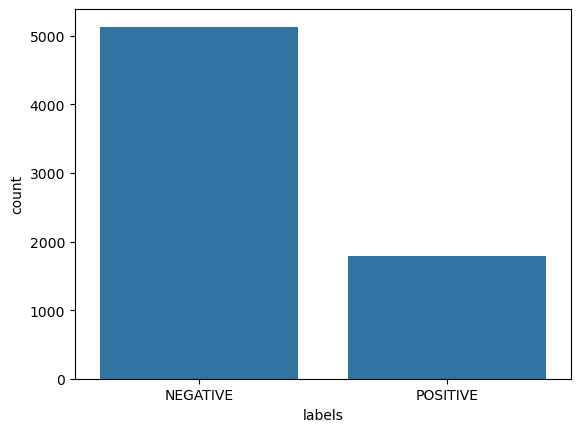

In [33]:
sns.countplot(data=data, x='labels')

<Axes: xlabel='month', ylabel='score'>

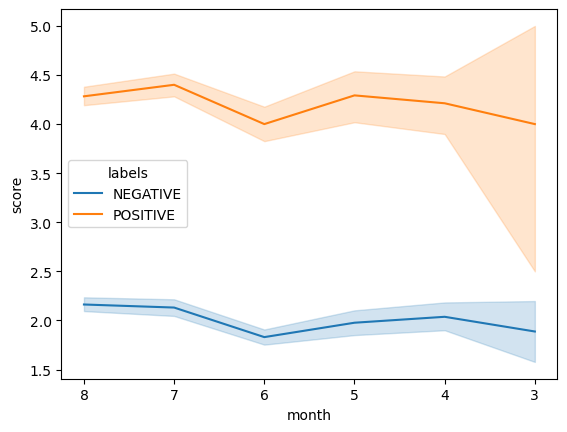

In [34]:
sns.lineplot(data=data, x='month', hue='labels', y='score')

<Axes: xlabel='month', ylabel='Count'>

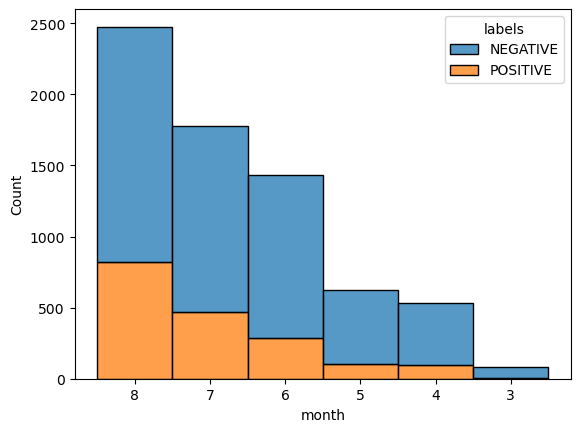

In [35]:
sns.histplot(data=data, x="month", hue="labels", multiple="stack")

<Axes: xlabel='majorVersion', ylabel='Count'>

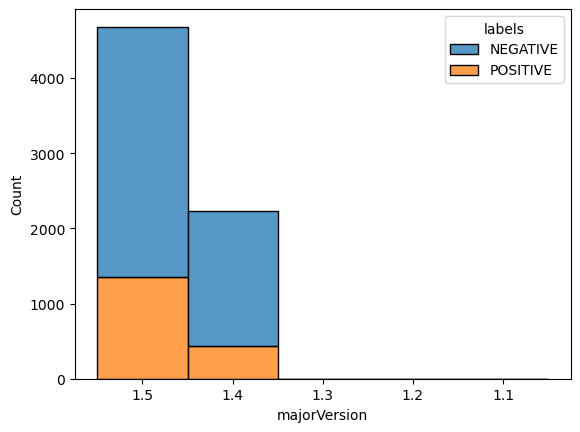

In [36]:
sns.histplot(data=data, x="majorVersion", hue="labels", multiple="stack")

# Topic Analysis

In [41]:
!pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [85]:
negative = docs[docs['text_label']=='NEGATIVE']['text_lemitizing']
positive = docs[docs['text_label']=='POSITIVE']['text_lemitizing']

In [48]:
from bertopic import BERTopic
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired
from umap import UMAP

In [71]:
embedding_model = pipeline("feature-extraction", model="distilbert-base-cased")
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
vectorizer_model = CountVectorizer(min_df=10)
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)
representation_model = KeyBERTInspired()

def topic(n_cluster):
    topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=AgglomerativeClustering(n_clusters=n_cluster),
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    representation_model=representation_model,
    calculate_probabilities=True,
    verbose=True,
    )
    return topic_model

Device set to use cuda:0


In [86]:
negative_topic = topic(30)
negative_info = negative_topic.fit_transform(negative)
negative_info = negative_topic.get_topic_info()
negative_info

2025-08-29 07:13:45,367 - BERTopic - Embedding - Transforming documents to embeddings.
100% 5132/5132 [00:08<00:00, 592.85it/s]
2025-08-29 07:13:54,033 - BERTopic - Embedding - Completed ✓
2025-08-29 07:13:54,033 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-29 07:13:54,693 - BERTopic - Dimensionality - Completed ✓
2025-08-29 07:13:54,693 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-29 07:13:54,971 - BERTopic - Cluster - Completed ✓
2025-08-29 07:13:54,973 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-29 07:13:55,796 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,385,0_refund_hasnt_doesnt_didnt,"[refund, hasnt, doesnt, didnt, topup, cashback...",[payment loan always time repayment apply loan...
1,1,370,1_goopay_hasnt_apk_isnt,"[goopay, hasnt, apk, isnt, doesnt, topup, coul...",[money cut transaction history doesnt show cle...
2,2,333,2_gopaylater_google_doesnt_didnt,"[gopaylater, google, doesnt, didnt, topup, apk...",[im sorry c gopay lost balance gopay google pl...
3,3,266,3_thank_cheap_hopefully_buy,"[thank, cheap, hopefully, buy, really, discoun...",[like use gopay get pulse cheap lot promotion ...
4,4,251,4_uninstall_otp_doesnt_wifi,"[uninstall, otp, doesnt, wifi, login, apk, wdp...",[want log gopay account facial verification fa...
5,5,220,5_havent_isnt_doesnt_arent,"[havent, isnt, doesnt, arent, couldnt, didnt, ...","[gopay top doesnt come, want top dont money, t..."
6,6,214,6_ewallet_apk_topup_useless,"[ewallet, apk, topup, useless, buy, cheap, hop...","[easy convenient long im using app helpful, ap..."
7,7,205,7_waiting_wait_buy_got,"[waiting, wait, buy, got, getting, account, tr...",[use gopayevery transaction buy pln token puls...
8,8,201,8_gopaylater_hasnt_didnt_couldnt,"[gopaylater, hasnt, didnt, couldnt, doesnt, wh...",[disappointed top indomart status successful b...
9,9,190,9_uninstall_hasnt_isnt_doesnt,"[uninstall, hasnt, isnt, doesnt, didnt, apk, n...",[app didnt help transfer another bank dont go ...


In [89]:
positive_topic = topic(12)
positive_info = positive_topic.fit_transform(positive)
positive_info = positive_topic.get_topic_info()
positive_info

2025-08-29 07:14:55,846 - BERTopic - Embedding - Transforming documents to embeddings.
100% 1788/1788 [00:02<00:00, 653.46it/s]
2025-08-29 07:14:58,590 - BERTopic - Embedding - Completed ✓
2025-08-29 07:14:58,590 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-29 07:15:00,181 - BERTopic - Dimensionality - Completed ✓
2025-08-29 07:15:00,182 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-29 07:15:00,201 - BERTopic - Cluster - Completed ✓
2025-08-29 07:15:00,202 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-29 07:15:00,283 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,278,0_thank_understand_really_hopefully,"[thank, understand, really, hopefully, helpful...",[helpful make easier convenient use daily life...
1,1,215,1_thank_really_hopefully_understand,"[thank, really, hopefully, understand, helpful...",[free transfer x money minus free transfer ban...
2,2,211,2_thank_really_hopefully_understand,"[thank, really, hopefully, understand, helpful...",[always like feature gopay always updating mak...
3,3,210,3_thank_really_hopefully_understand,"[thank, really, hopefully, understand, helpful...",[good good good good good good good good good ...
4,4,200,4_thank_really_hopefully_understand,"[thank, really, hopefully, understand, helpful...","[helpful easy use, good easy use simple, perfe..."
5,5,181,5_thank_hopefully_understand_really,"[thank, hopefully, understand, really, helpful...",[im top balance two time first thats second go...
6,6,146,6_thank_really_hopefully_helpful,"[thank, really, hopefully, helpful, understand...","[really good help lot promotion, nice make eas..."
7,7,126,7_thank_understand_helpful_really,"[thank, understand, helpful, really, hopefully...","[helpful easy manyin promonyaa min thank, real..."
8,8,117,8_thank_really_understand_hopefully,"[thank, really, understand, hopefully, helpful...","[there lot benefit using there lot promotion, ..."
9,9,54,9_hopefully_understand_lot_easier,"[hopefully, understand, lot, easier, transacti...","[rest balance already balance come increase, a..."


# Conclusions